In [1]:
import math
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import metrics, linear_model, tree, naive_bayes, neighbors, ensemble,\
                    neural_network, svm, decomposition, manifold
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import dmba
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV



from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary


In [37]:
delays_df = dmba.load_data('FlightDelays.csv')

# convert to categorical
delays_df.DAY_WEEK = delays_df.DAY_WEEK.astype('category')

# create hourly bins departure time 
delays_df.CRS_DEP_TIME = [round(t / 200) for t in delays_df.CRS_DEP_TIME]
delays_df.CRS_DEP_TIME = delays_df.CRS_DEP_TIME.astype('category')


In [38]:
print(delays_df.head)

<bound method NDFrame.head of      CRS_DEP_TIME CARRIER  DEP_TIME DEST  DISTANCE     FL_DATE  FL_NUM ORIGIN  \
0               7      OH      1455  JFK       184  01/01/2004    5935    BWI   
1               8      DH      1640  JFK       213  01/01/2004    6155    DCA   
2               6      DH      1245  LGA       229  01/01/2004    7208    IAD   
3               9      DH      1709  LGA       229  01/01/2004    7215    IAD   
4               5      DH      1035  LGA       229  01/01/2004    7792    IAD   
...           ...     ...       ...  ...       ...         ...     ...    ...   
2196            3      RU       644  EWR       199   1/31/2004    2761    DCA   
2197            8      RU      1653  EWR       213   1/31/2004    2497    IAD   
2198            8      RU      1558  EWR       199   1/31/2004    2361    DCA   
2199            7      RU      1403  EWR       199   1/31/2004    2216    DCA   
2200            9      RU      1736  EWR       199   1/31/2004    2097    DCA  

In [3]:

delays_df['isDelayed'] = [1 if status == 'delayed' else 0 
                          for status in delays_df['Flight Status']]

In [4]:

# convert to categorical
delays_df.DAY_WEEK = delays_df.DAY_WEEK.astype('category')

In [5]:

# create hourly bins departure time 
delays_df.CRS_DEP_TIME = [round(t / 100) for t in delays_df.CRS_DEP_TIME]
delays_df.CRS_DEP_TIME = delays_df.CRS_DEP_TIME.astype('category')

delays_df = delays_df.drop(columns=['DEP_TIME', 'DAY_OF_MONTH'])


In [6]:

predictors = ['DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER', 'Weather']
outcome = 'isDelayed'

In [7]:

X = pd.get_dummies(delays_df[predictors], drop_first=True)
y = delays_df[outcome]
classes = ['ontime', 'delayed']

In [8]:

# split into training and validation
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, 
                                                      random_state=1)

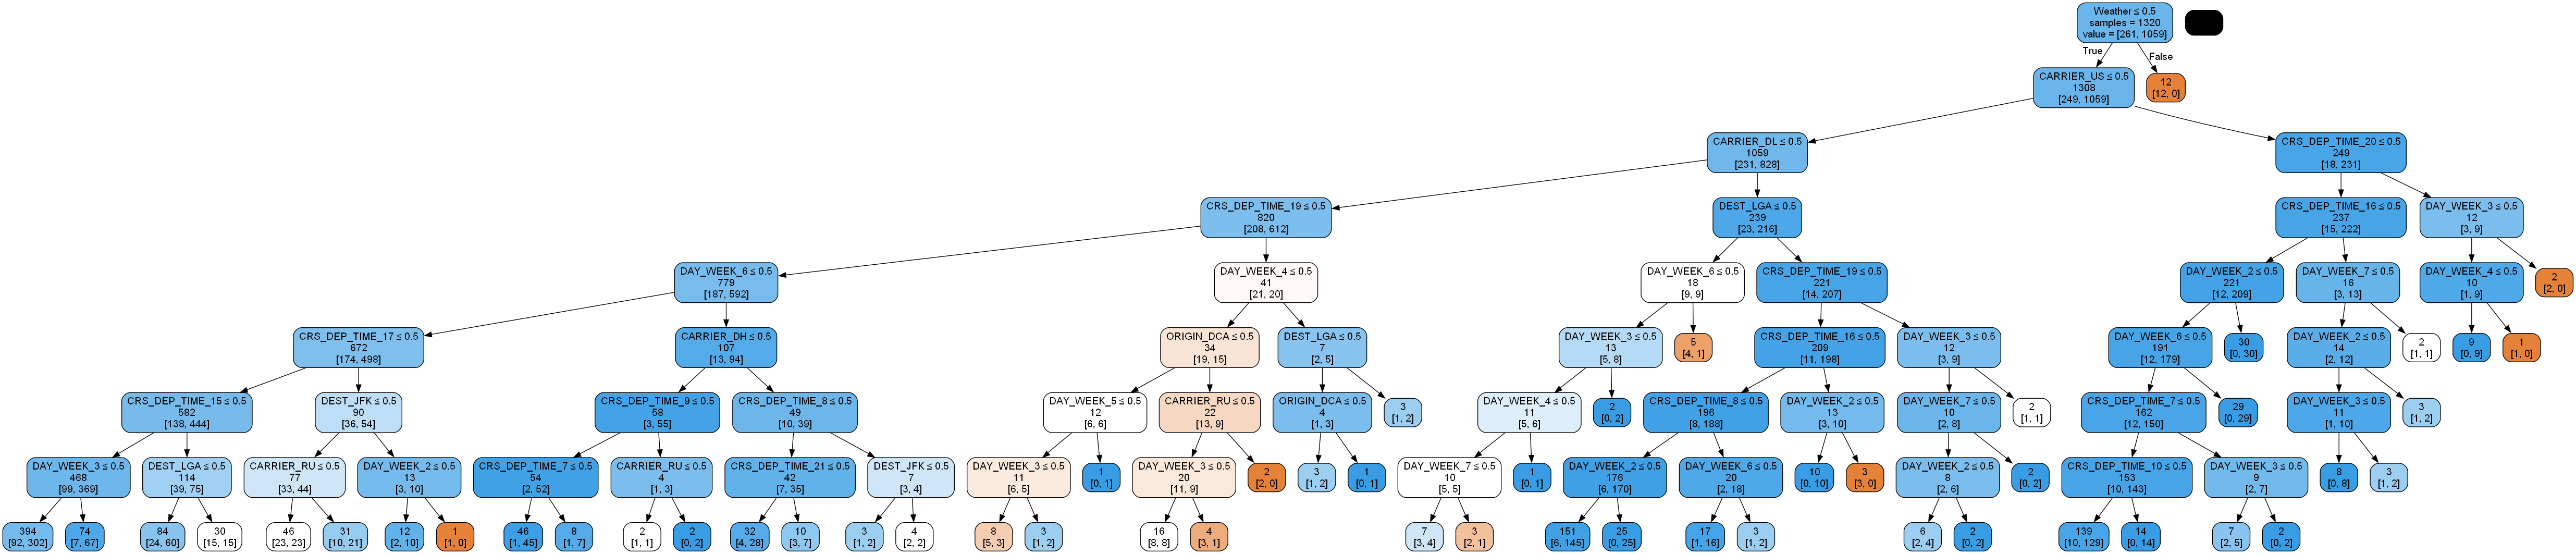

In [36]:

fullClassTree = DecisionTreeClassifier( max_depth=8)
fullClassTree.fit(train_X, train_y)

plotDecisionTree(fullClassTree, feature_names=train_X.columns)

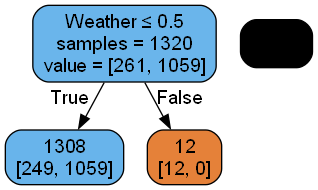

In [35]:

fullClassTree = DecisionTreeClassifier( max_depth=8, min_impurity_decrease=0.01)
fullClassTree.fit(train_X, train_y)

plotDecisionTree(fullClassTree, feature_names=train_X.columns)

In [22]:
classificationSummary(train_y, fullClassTree.predict(train_X))
classificationSummary(valid_y, fullClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.8114)

       Prediction
Actual    0    1
     0   12  249
     1    0 1059
Confusion Matrix (Accuracy 0.8331)

       Prediction
Actual   0   1
     0  20 147
     1   0 714
